In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv(os.getcwd()+'/kaggle/input/bike-sharing-demand/train.csv') ## train, test를 쭉 훑어 보고 일단 모델 하나 잡아서 제출부터 하고 거기서부터 성능을 올린다.
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
test = pd.read_csv(os.getcwd()+'/kaggle/input/bike-sharing-demand/test.csv')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [4]:
train.dtypes ## object type이 섞여 있다. 이건 그대로 못쓰고 숫자형으로 바꿔주어야 한다.

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
train['datetime'] = train['datetime'].astype('datetime64') # 처음에는 object type을 지운다음 바로 트레이닝,테스트 해보기. 그다음에 필요하면 object 타입을 숫자로 바꾸기.
# astype은 datetime 칼럼의 object들을 datetime64 타입으로 바꿔준다. 날짜 데이터는 그냥 이런식으로 처리하면 빠르게 할 수 있음.
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
train['hour'] = train['datetime'].dt.hour ## datetime64로 바꾼 값에서 시 부분만 빼서 'hour'라는 새로운 칼럼에 넣어준다. 
# datetime에 넣지말고 꼭 hour라는 새로운 칼럼을 만들어서 넣기. 나중에 datetime을 또 쓸 수 있음.
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22


In [7]:
train['year'] = train['datetime'].dt.year ## hour, year 등 시간은 숫자적인 느낌보다는 카테고리적인 느낌이 강하다. 각 칼럼이 숫자형인지 범주형인지 알아야함.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011


In [8]:
train['weekday'] = train['datetime'].dt.weekday ## 요일추가, 0~6으로 요일 표현
train.head()
## weekday를 추가했으니 주중인지 주말인지를 나타내는 workingday는 지워도 될까?
## 그렇지 않다. working day와 weekday의 정보량에 겹치는 부분이 분명 많을테지만 working day만이 가지고 있는 정보도 있으므로 그냥 빼버리면 점수가 낮아질 수 있다. 실험 해봐야 알 수 있음.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,5


In [9]:
# train['month'] = train['datetime'].dt.month
# train.head()

In [10]:
train['day'] = train['datetime'].dt.day
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,weekday,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,5,1


In [11]:
test['datetime'] = test['datetime'].astype('datetime64') ## esc 누르고 f누르면 한 셀 안에서 모든 train이라는 문자를 test로 일괄적으로 바꿀 수 있다.
## 마우스로 변수이름 더블클릭하면 변수이름이 전체선택이 됨.
test['hour'] = test['datetime'].dt.hour ## 항상 test 데이터에도 똑같이 처리해준다.
## 여기까지 하고 run all 하면 아래에 있는 코드들도 에러없이 실행됨. 이렇게 feature를 다시 바꾸는 작업만 하고 다시 전체실행하면 training, test가 자동으로 다 되도록 코드를 짜놔야 빠르게
## 할 수 있다.

In [12]:
test['year'] = test['datetime'].dt.year

In [13]:
test['weekday'] = test['datetime'].dt.weekday 

In [14]:
# test['month'] = test['datetime'].dt.month

In [15]:
test['day'] = test['datetime'].dt.day

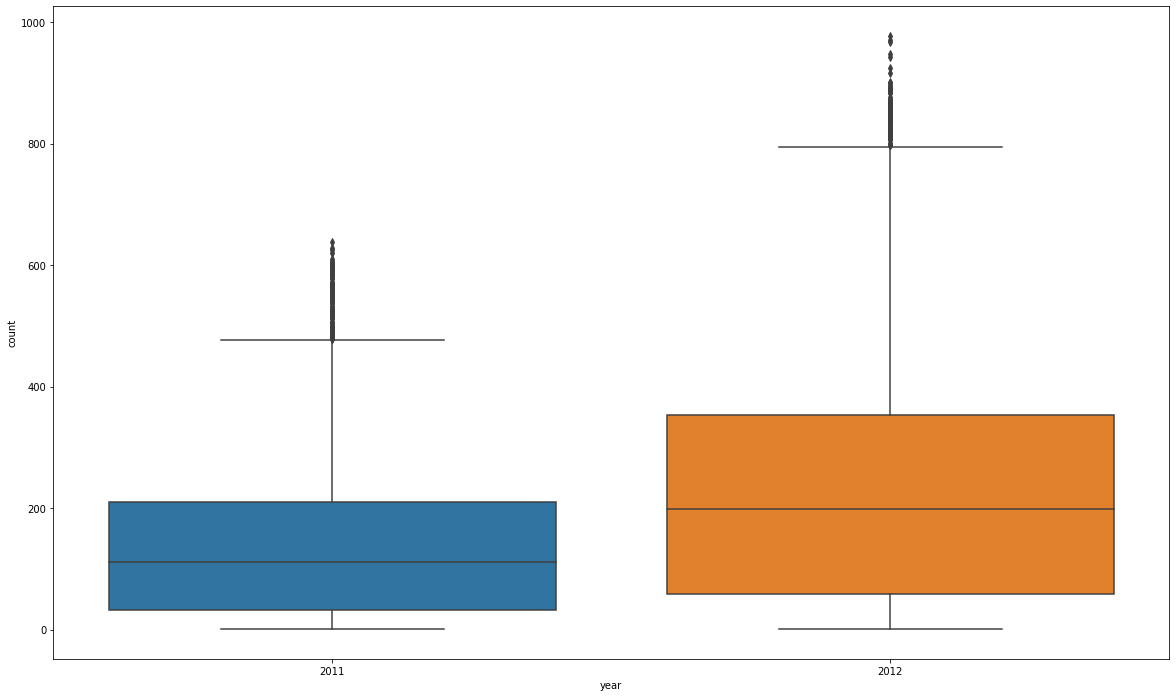

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,12))
sns.boxplot(train['year'], train['count']) # 범주형 변수에 따른 y값 변화는 boxplot으로 확인.
## year에 따른 차이가 분명히 보인다. 이건 feature로 추가하면 도움이 될 것이다.( 물론 그전에 차이가 유의미한지 보기위해해 year에 따른 데이터의 개수가 충분히 많은지 value_counts로 확인인)

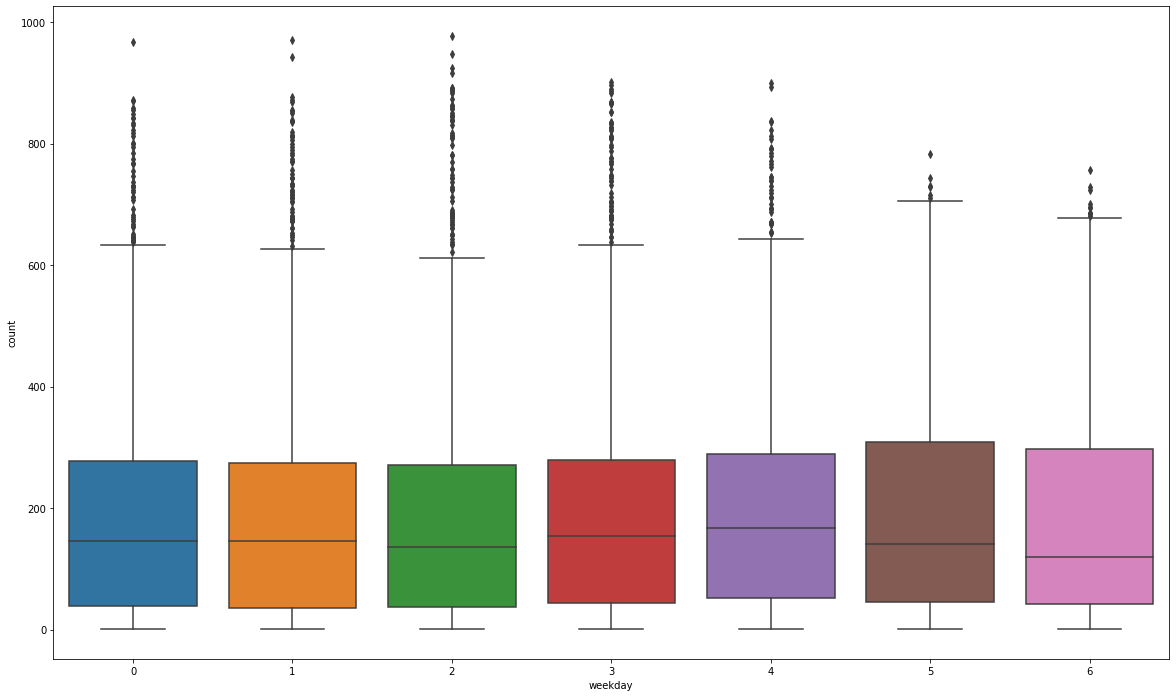

In [17]:
plt.figure(figsize = (20,12))
sns.boxplot(train['weekday'], train['count']) ## 별로 차이가 안보인다. 다만 토요일에는 차이가 좀 있다. 각 요일마다 데이터 개수가 충분히 많으면 진짜로 차이가 있는 것이므로 feature로 쓸 수 있다.

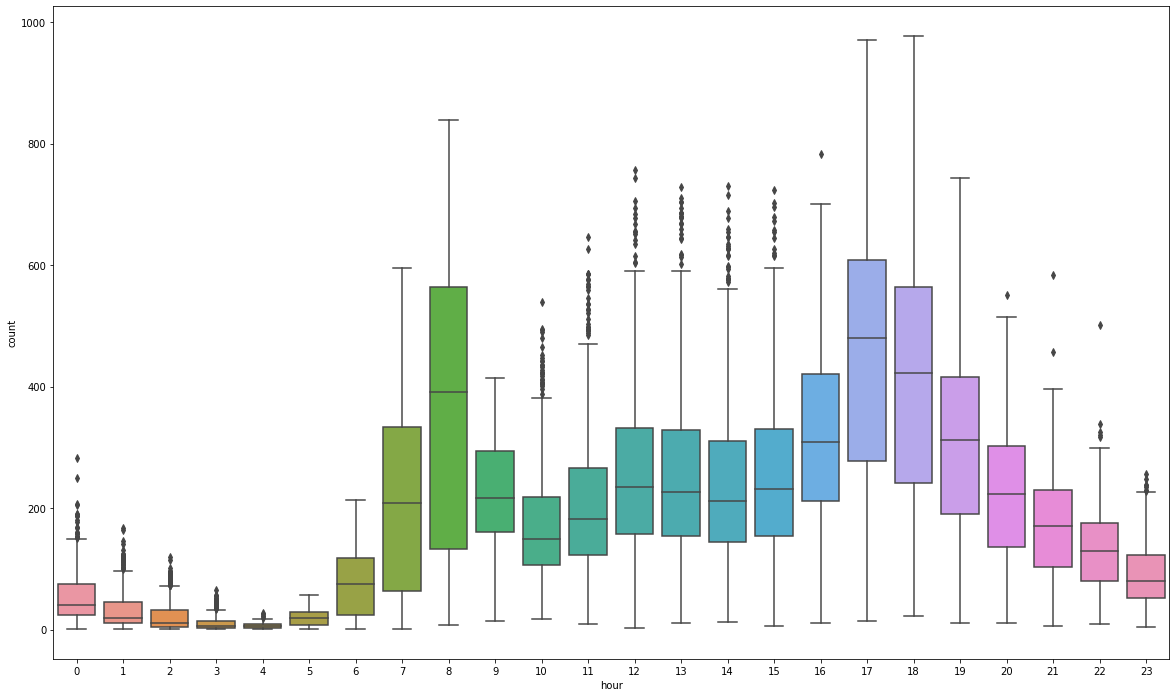

In [18]:
plt.figure(figsize = (20,12))
sns.boxplot(train['hour'], train['count']) 
# 오전 10시 ~ 오후 15시에 아웃라이어가 이상하게 많음. --> hour로 보면 주말과 주중을 전부 합쳐서 보는 것이어서 그렇다. 즉 아웃라이어들은 주말의 데이터들 때문임. 주말에는 많이 빌리기때문.

In [19]:
train['workingday'] == 1 

0        False
1        False
2        False
3        False
4        False
         ...  
10881     True
10882     True
10883     True
10884     True
10885     True
Name: workingday, Length: 10886, dtype: bool

In [20]:
weekday = train[train['workingday'] == 1] ## 불리언 인덱싱 이용. 주중과 주말로 나누어서 본다.
weekend = train[train['workingday'] == 0] ## weekend = train[train['workingday'] != 1]
weekend

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,weekday,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109,19,2012,6,16
10810,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122,20,2012,6,16
10811,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106,21,2012,6,16
10812,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89,22,2012,6,16


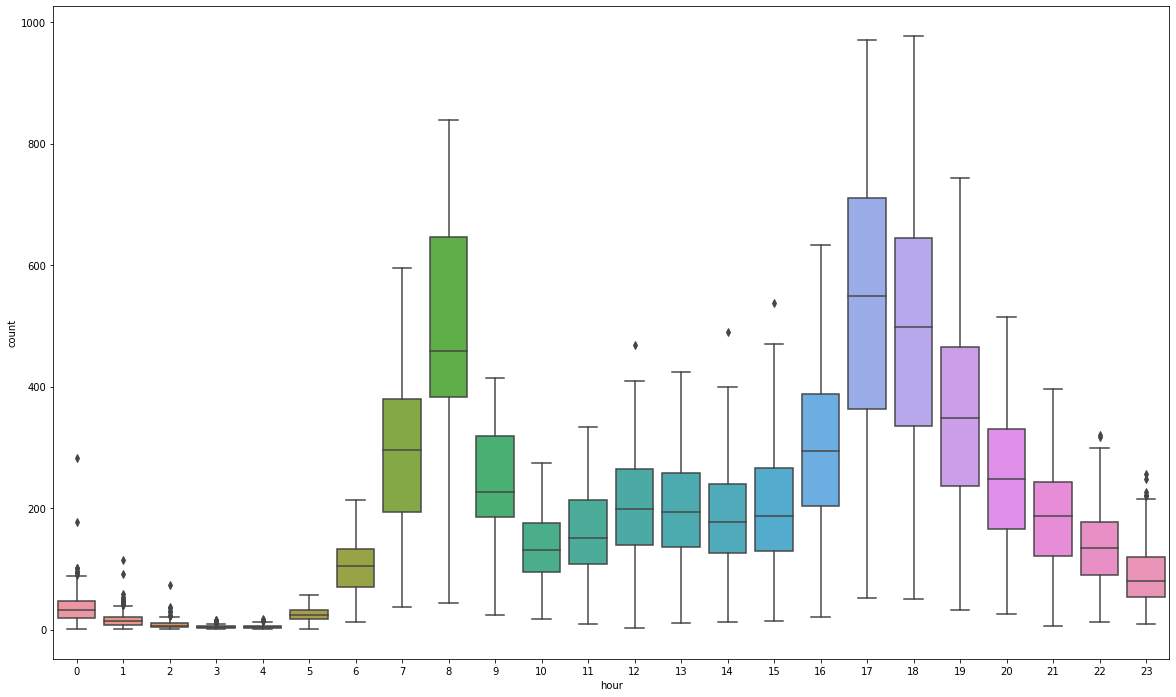

In [21]:
plt.figure(figsize = (20,12))
sns.boxplot(weekday['hour'], train['count'])

In [22]:
weekday['count'].mean()

193.01187263896384

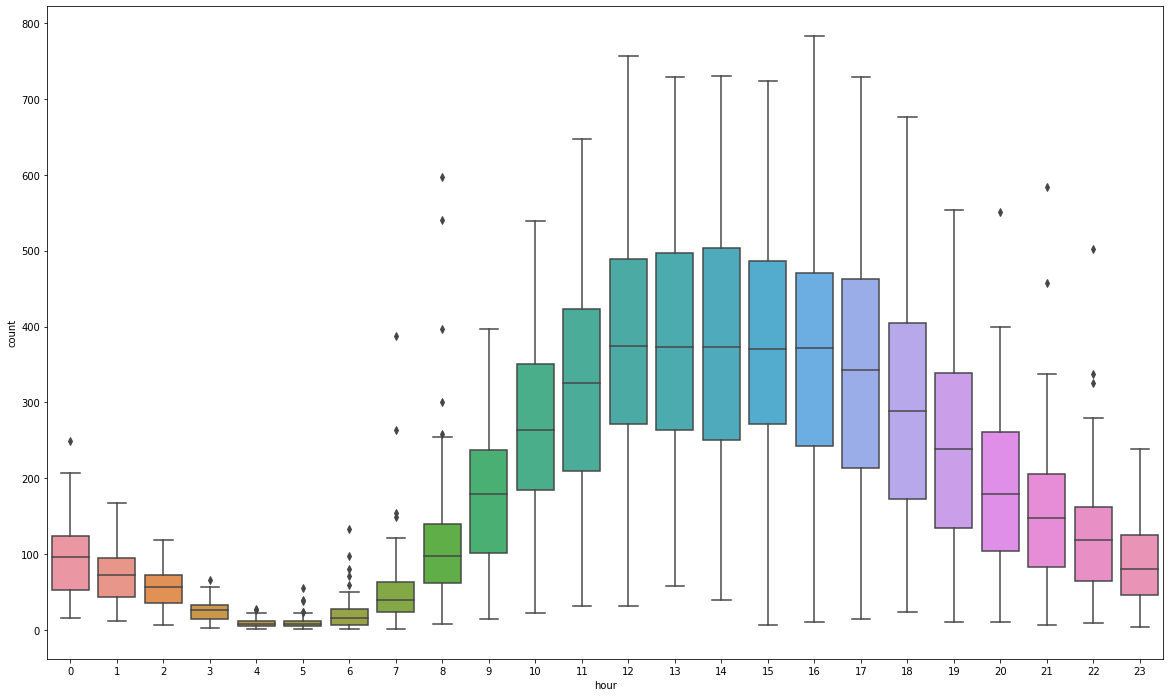

In [23]:
plt.figure(figsize = (20,12))
sns.boxplot(weekend['hour'], train['count']) ## weekday와 패턴이 많이 다르다

In [24]:
weekend['count'].mean()

188.50662061024755

In [25]:
train['weekday'].value_counts() # 각 값에따른 데이터 개수. 골고루 들어있음. 데이터가 충분하므로  요일별 count의 차이는 실제로 차이가 있는것이라 볼 수있음. feature로 쓸 수 있다.

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: weekday, dtype: int64

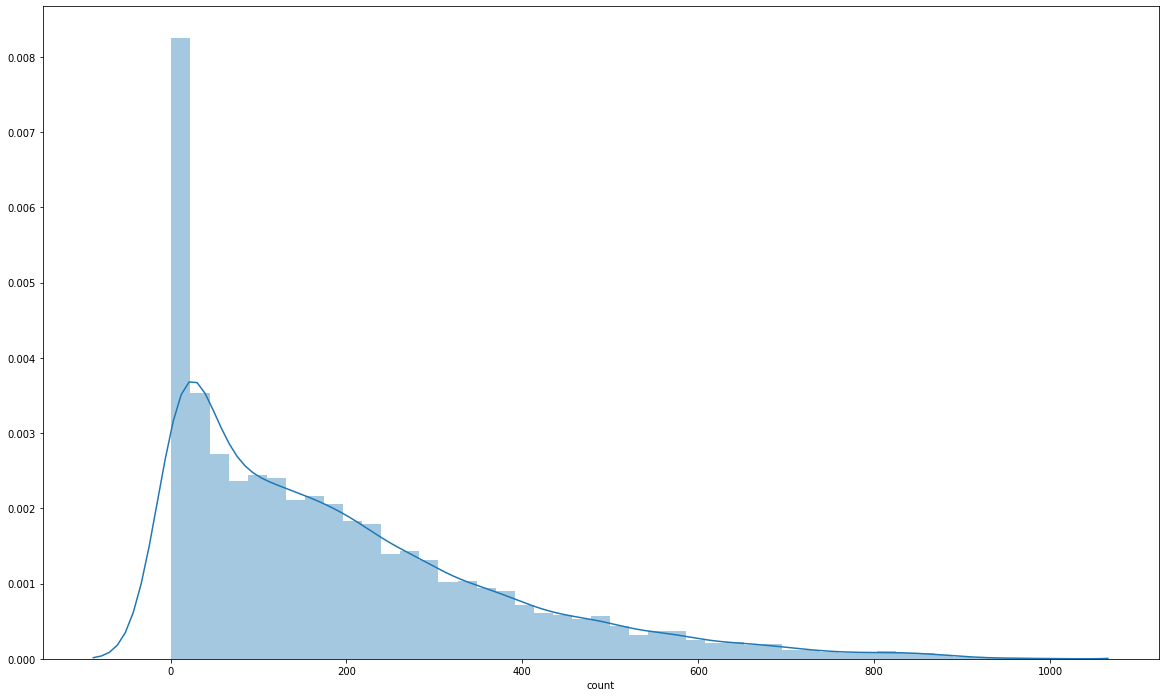

In [26]:
plt.figure(figsize=(20,12))
sns.distplot(train['count'])##항상 y값의 분포를 봐야한다. count가 800~900값을 가지는 데이터는 개수가 적기때문에 맞추기 힘들다.
## 800~900 같은 아웃라이어에 대해서는 mse가 매우 높아진다. 트레인 데이터에 있는 x와 테스트 데이터의 x가 비슷한테 y가 매우 다른 경우가 있을 경우 점수가 낮아짐.
## 아웃라이어를 제거해버리면? 점수에 좋은 영향을 주는 아웃라이어까지 지워져 버리면 문제가 됨.

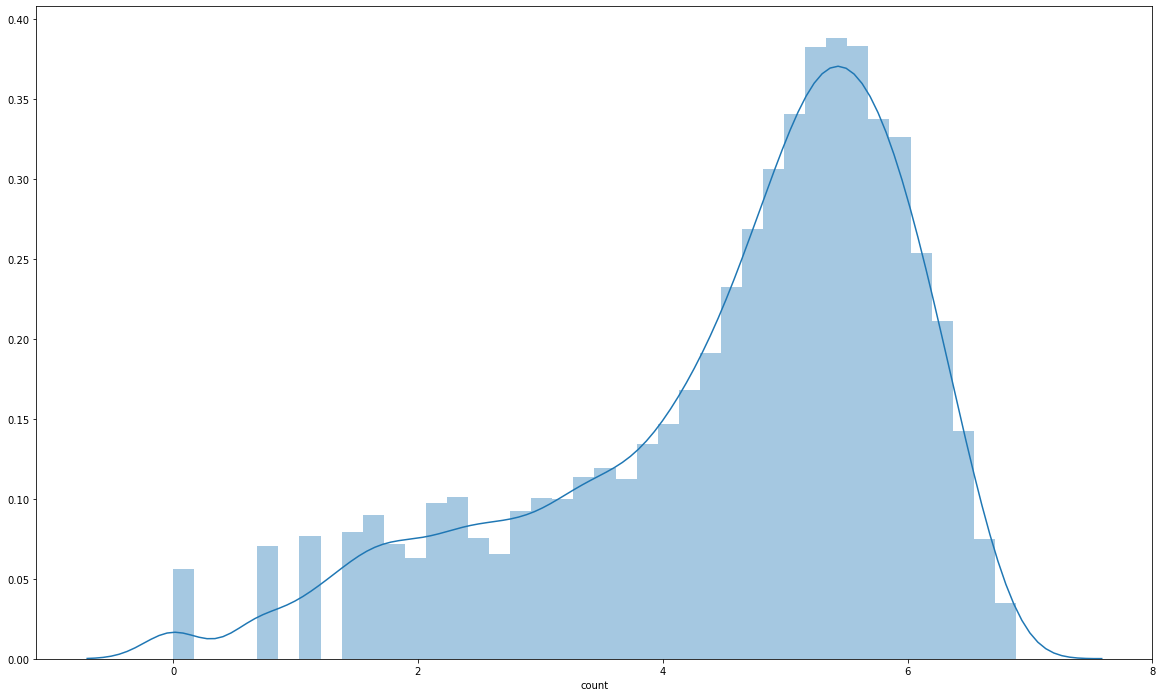

In [27]:
plt.figure(figsize=(20,12))
sns.distplot(np.log(train['count'])) ## 한쪽으로 쏠린게 조금 완화 --> 아웃라이어 학습에 용이. 스케일도 훨씬 작아짐.
## 0~1000에서 범위가 0~7로 줄면 범위 밖으로 나가는 경우가 조금 없어진다. 위에서는 아웃라이어에 대한 데이터가 적어서 예측을 잘 못하고 범위밖으로 튀게 예측할 수 있다.
# 아래에서는 아웃라이어 쪽에 대한 데이터가 더 모이면서 많아졌으므로 학습을 더 잘할 수 있게 된다.
## 여기서 로그를 씌운건 스케일링과는 다른 개념이다. x값이 아니라 y값에 씌웠기 때문. 디시젼트리는 x값의 스케일은 상관없다.

In [28]:
train2 = train.drop(['datetime', 'count', 'casual', 'registered'], axis=1) ## test에는 없는 feature는 train 데이터에도 지워주기

In [29]:
train2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,day
0,1,0,0,1,9.84,14.395,81,0.0000,0,2011,5,1
1,1,0,0,1,9.02,13.635,80,0.0000,1,2011,5,1
2,1,0,0,1,9.02,13.635,80,0.0000,2,2011,5,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,5,1
4,1,0,0,1,9.84,14.395,75,0.0000,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,2012,2,19
10882,4,0,1,1,14.76,17.425,57,15.0013,20,2012,2,19
10883,4,0,1,1,13.94,15.910,61,15.0013,21,2012,2,19
10884,4,0,1,1,13.94,17.425,61,6.0032,22,2012,2,19


In [30]:
test2 = test.drop(['datetime'], axis=1) ## default로 axis=0으로 되어있음. axis=1로 해야 column을 지울 수 있다.
## .drop([1,2,3], axis=0) 으로 하면 1,2,3행을 지운다.

In [31]:
test2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,day
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3,20
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3,20
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3,20
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3,20
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,2012,0,31
6489,1,0,1,2,10.66,12.880,60,11.0014,20,2012,0,31
6490,1,0,1,1,10.66,12.880,60,11.0014,21,2012,0,31
6491,1,0,1,1,10.66,13.635,56,8.9981,22,2012,0,31


## 트리모델
부스팅은 옵션을 매우 세밀하게,조심스럽게 해줘야 한다.
- 부스팅은 train 데이터를 rf보다 더 집중적으로 학습한다. 잔차를 학습하기 때문이다.
- 그러므로 과적합, 언더피팅이 더 심한 경우가 많다.
- 그래서 하이퍼파라미터를 잘 튜닝해야한다. 그럴 자신없으면 그냥 rf쓰는게 더 나음. 옵션설정 제대로 못하면 rf보다 못하기 쉽다.
- xgb는 모든 데이터를 세분화 하려한다.(level wise로 트리를 만듦)
- lgb는 IG가 높은 feature를 중심으로 트리를 만든다.(leaf wise로 만듦)

In [32]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_jobs = -1) ## n_jobs 는 cpu사용개수. -1은 다쓴다는거임. 4개까지 가능.
## 위의 데이터를 보면 각 feature의 scale이 다르다. 다만 트리는 feature의 스케일링이 필요 없다. 어차피 주어진 scale내에서 노드를 분할하기 때문.
## 다른 모델은 스케일링이 필요할 수 있다.
## 일반적으로 거리 혹은 유사도를 기반으로 하는 KNN, SVM같은 알고리즘은 스케일링이 중요하다
## Fisher LDA, Naive Bayes, tree based model 같은 graphical model based algorightm은 스케일링에 민감하지 않다. 다만 필요에 따라 해도 되긴 함.
## 트리는 중요한 feature를 알아서 학습하는 점(information gain)이 좋음.
## 위의 데이타를 보면 각 숫자의 의미가 카테고리적인 느낌이 강하다. 예를 들어 season을 보면 1~4까지 값을 가지는데 1 은 봄,2는 여름, 3은 가을,4는 겨울 같은 느낌이다.
## 즉, 4가 1의 4배의 어떤 의미를 가지는게 아님. 숫자의 느낌이 아니라 카테고리의 느낌이 강하다. 이런 데이터의 경우는 비선형이기 때문에 트리가 다른 모델보다 더 잘 학습한다.
# rf.fit(train2, np.log(train['count'])) ## train['count'] 대신에 train.iloc[:,-1]라고 해도 된다. 인덱스로 쓰려면 .iloc을 써야 함. 
# result = rf.predict(test2)
# result
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth = 6, learning_rate = 0.1) ## xgb를 옵션설정 없이 그냥 쓰면 점수가 더 나빠지기 쉽다.
# max_depth = 얼마나 데이터를 나눌지. 너무 작으면 언더피팅 일어남. 데이터 복잡도에 맞게 설정해야 한다.
# 데이터 개수가 많을수록 max_depth를 깊게해야한다. 데이터가 몇만개면 복잡도가 중간정도임. 만개 이하면 복잡도가 낮음.
# learning_rate가 작을수록 데이터를 세세하게 천천히 학습. 보통 0.1이하로.
xgb.fit(train2, np.log(train['count']))
result = xgb.predict(test2)
result
# from lightgbm import LGBMRegressor
# lgbm = LGBMRegressor()
# lgbm.fit(train2, np.log(train['count']))
# result = lgbm.predict(test2) ## xgb처럼 lgbm도 파라미터 설정없이 쓰면 떨어지는데 여기서는 더 좋아짐. 그냥 default 파라미터가 이 데이터에 우연히 잘 맞은 것 뿐이다.
# result

[18:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([2.4547694, 1.5345795, 1.1286774, ..., 4.6517687, 4.3935304,
       3.7903194], dtype=float32)

In [33]:
test['count'] = result
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,day,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3,20,2.454769
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3,20,1.534580
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3,20,1.128677
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3,20,0.599005
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3,20,0.555073


In [34]:
sub = pd.read_csv(os.getcwd()+'/kaggle/input/bike-sharing-demand/sampleSubmission.csv')
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [35]:
sub['count'] = np.exp(result) ## 로그 역함수
sub

,datetime,count
0,2011-01-20 00:00:00,11.643748
1,2011-01-20 01:00:00,4.639374
2,2011-01-20 02:00:00,3.091565
3,2011-01-20 03:00:00,1.820306
4,2011-01-20 04:00:00,1.742069
...,...,...
6488,2012-12-31 19:00:00,206.911499
6489,2012-12-31 20:00:00,125.401138
6490,2012-12-31 21:00:00,104.770126
6491,2012-12-31 22:00:00,80.925613


In [36]:
sub.to_csv('sub.csv', index=False) ## index = False로 해야함. 이걸 안하면 sub에 index까지 저장된다. index는 빼고 저장해야 한다.

시간에 대한 feature만 추가해도 등수가 매우 높아진다.(처음 3000등 정도에서 1400등 정도로 높아짐)
이유는? 
1. 다른 사람들은 시간에 대한 feature를 고려하지 못했다
2. 다른 사람들은 잘못된 모델을 사용하였다.

In [37]:
from copy import copy
train_temp = copy(train)
train_temp['month'] = train_temp['datetime'].dt.month
train_temp['month'].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

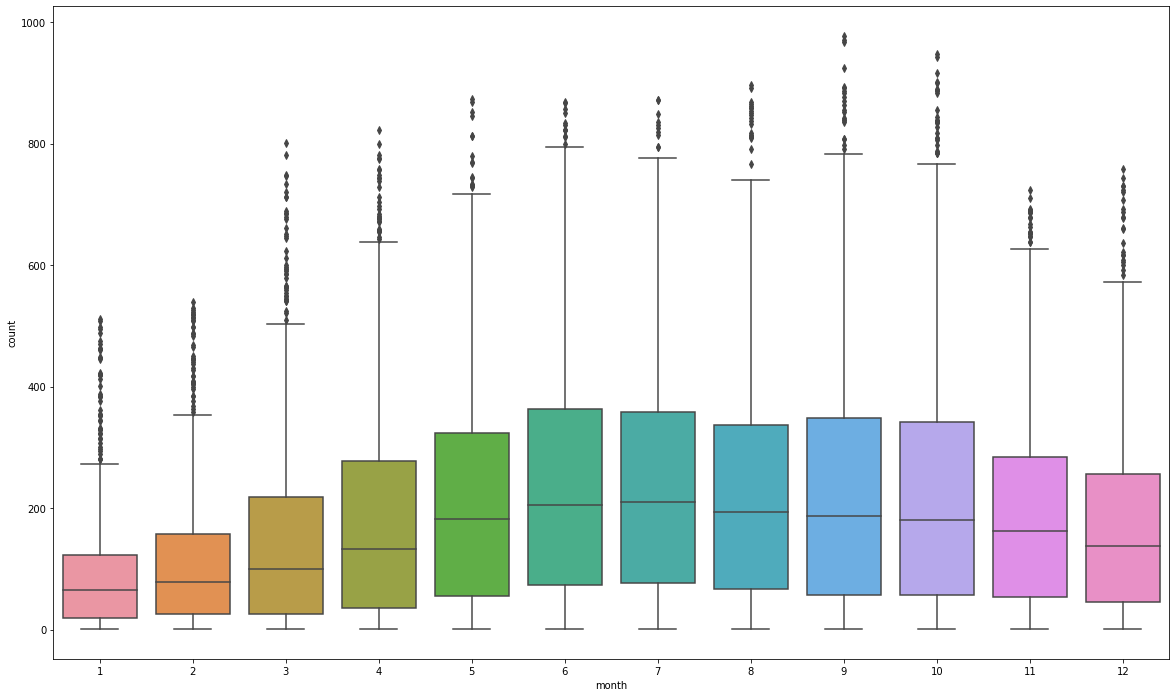

In [38]:
plt.figure(figsize = (20,12))
sns.boxplot(train_temp['month'], train_temp['count']) ## 아웃 라이어가 많다. 아마 월마다 보면 주중,주말을 같이 보니까 그럴 듯.
## 그래도 월에 따른 차이가 분명 있다. 생각해보면 겨울에는 자전거를 잘 안탈테니까. 
## 실제로 월을 넣어보니 점수가 더 안좋아졌다.

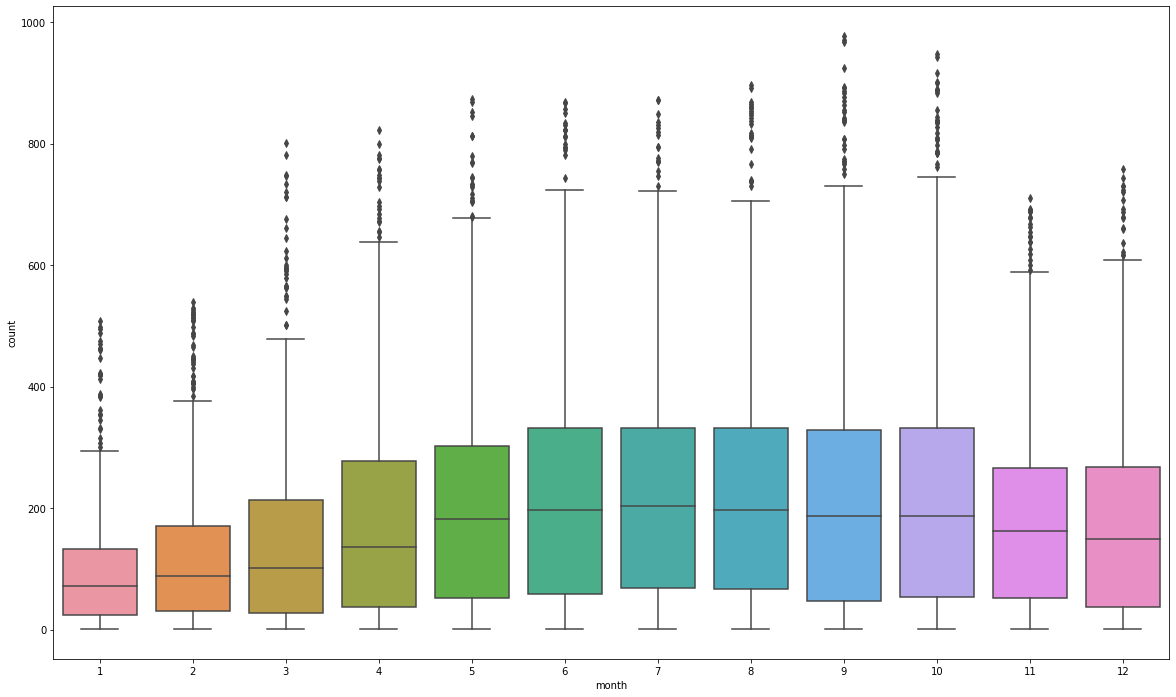

In [39]:
weekday2 = train_temp[train_temp['workingday'] == 1]
weekend2 = train_temp[train_temp['workingday'] == 0]
# display(weekday, weekend)
plt.figure(figsize = (20,12))
sns.boxplot(weekday2['month'], weekday2['count']) ## 주중으로 봐도 아웃라이어가 많다.

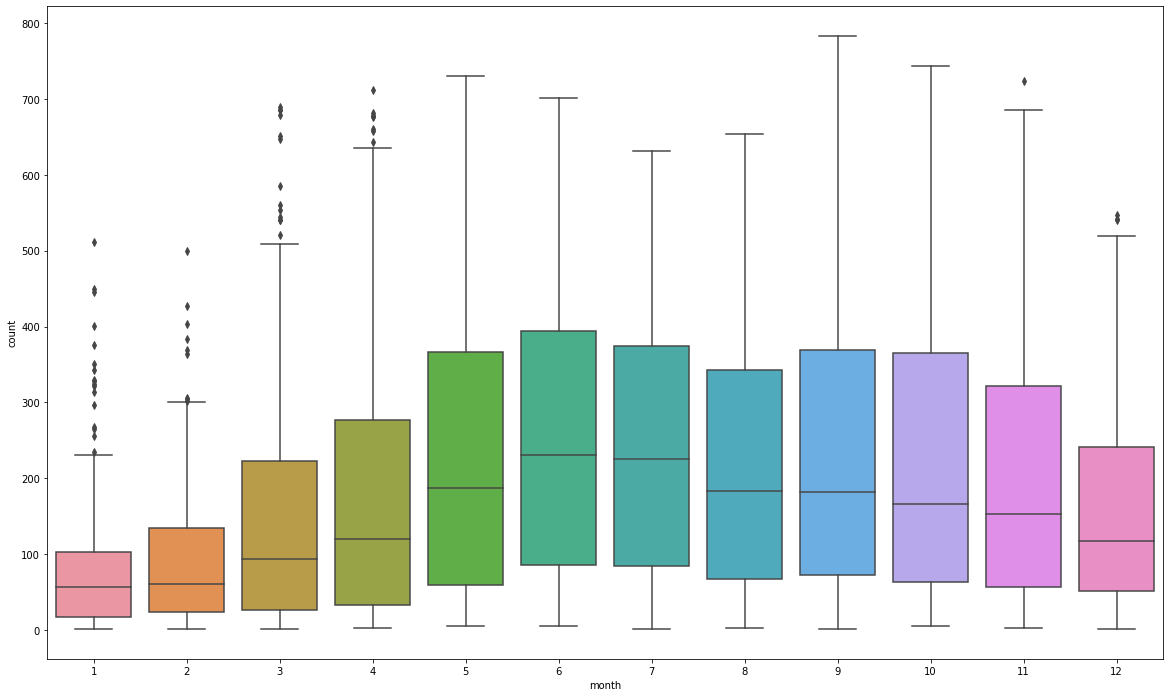

In [40]:
plt.figure(figsize = (20,12))
sns.boxplot(weekend2['month'], weekend2['count']) ## 주말로 보면 아웃라이어가 좀 덜하다. 주중에는 요일별로 많이 다른건가?
## 1,2,3월에는 아웃라이어가 좀 많은데 이건 뭐지? 토요일과 일요일로 나눠서 볼까?

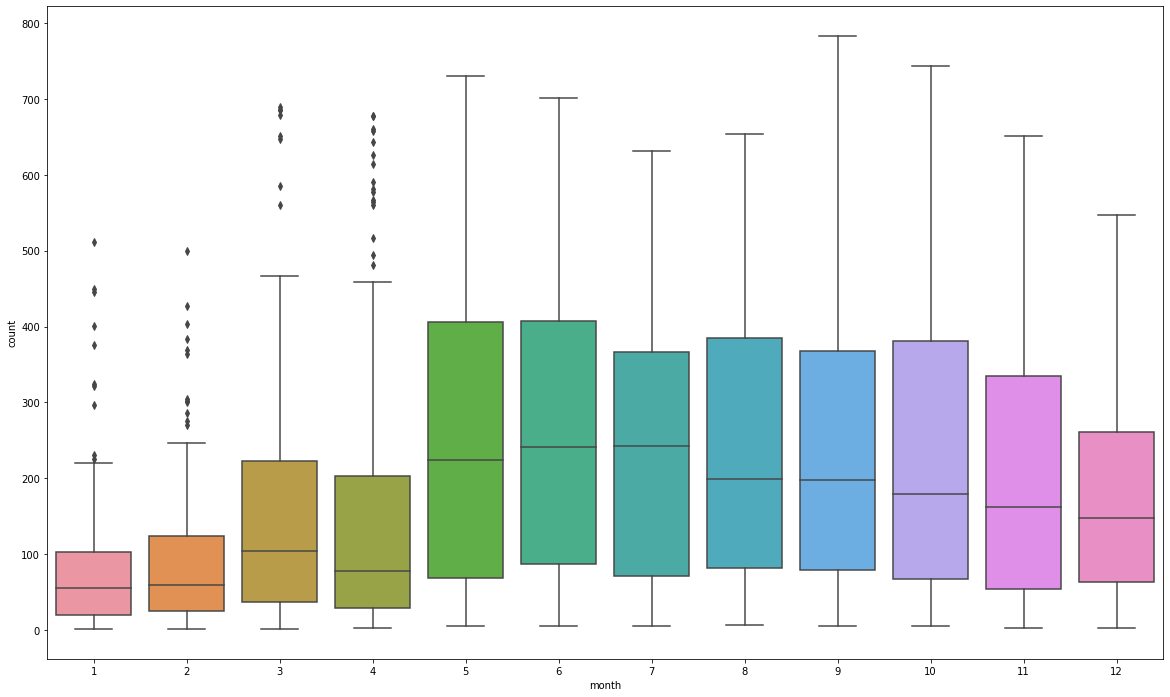

In [41]:
weekend_satur = weekend2[weekend2['weekday'] == 5] # 토요일
weekend_sun = weekend2[weekend2['weekday'] == 6] # 일요일
plt.figure(figsize = (20,12))
sns.boxplot(weekend_satur['month'], weekend_satur['count']) ## 토요일에는 아웃라이어가 여전히 많다. 특히 1~4월달에 많음. 1~4월달의 토요일 데이터가 적나?


In [42]:
weekend_satur['month'].value_counts() # 1~4월달의 토요일 데이터가 적진 않음.

12    144
11    144
9     144
6     144
3     144
2     144
10    120
8     120
7     120
5     120
4     120
1     120
Name: month, dtype: int64

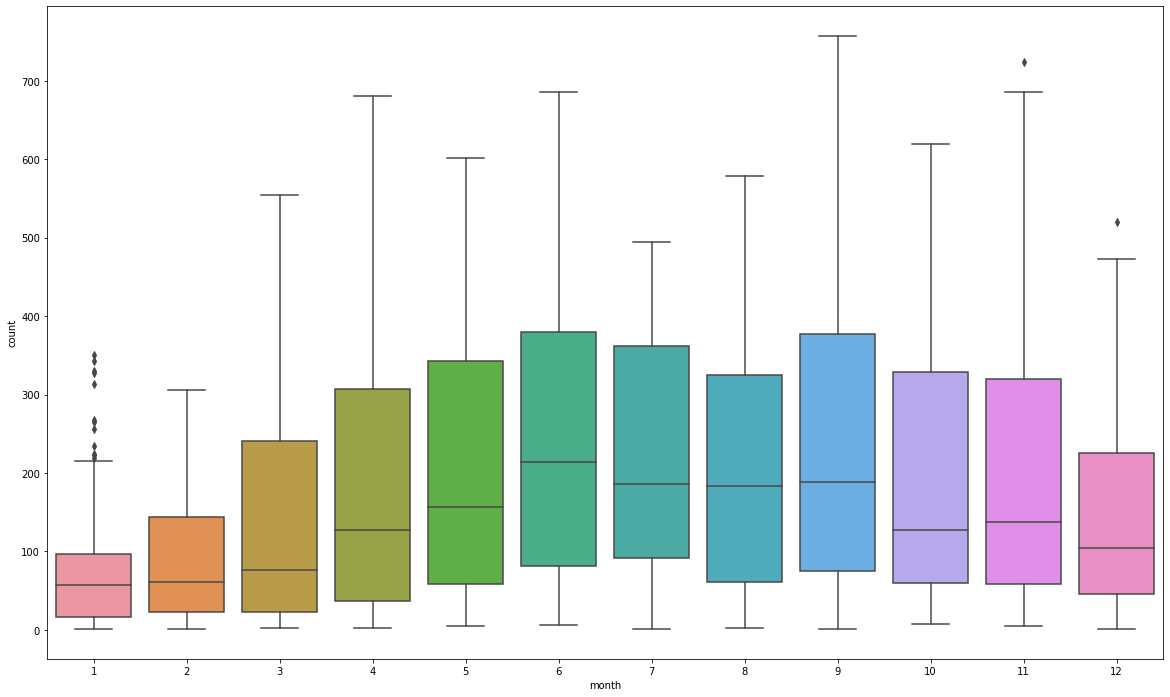

In [43]:
plt.figure(figsize = (20,12))
sns.boxplot(weekend_sun['month'], weekend_sun['count']) # 1월에는 아웃라이어가 많긴 하지만 나머지에서는 별로 없다.

In [44]:
train_temp2 = copy(train)
train_temp2['day'] = train_temp2['datetime'].dt.day
train_temp2['day'].value_counts() ## 일수에 따른 데이터 개수는 균일한 수준이다. 다만 19일까지만 있음. 일단 트레인 에러를 확인해서 오버피팅인지 좀 보자.

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

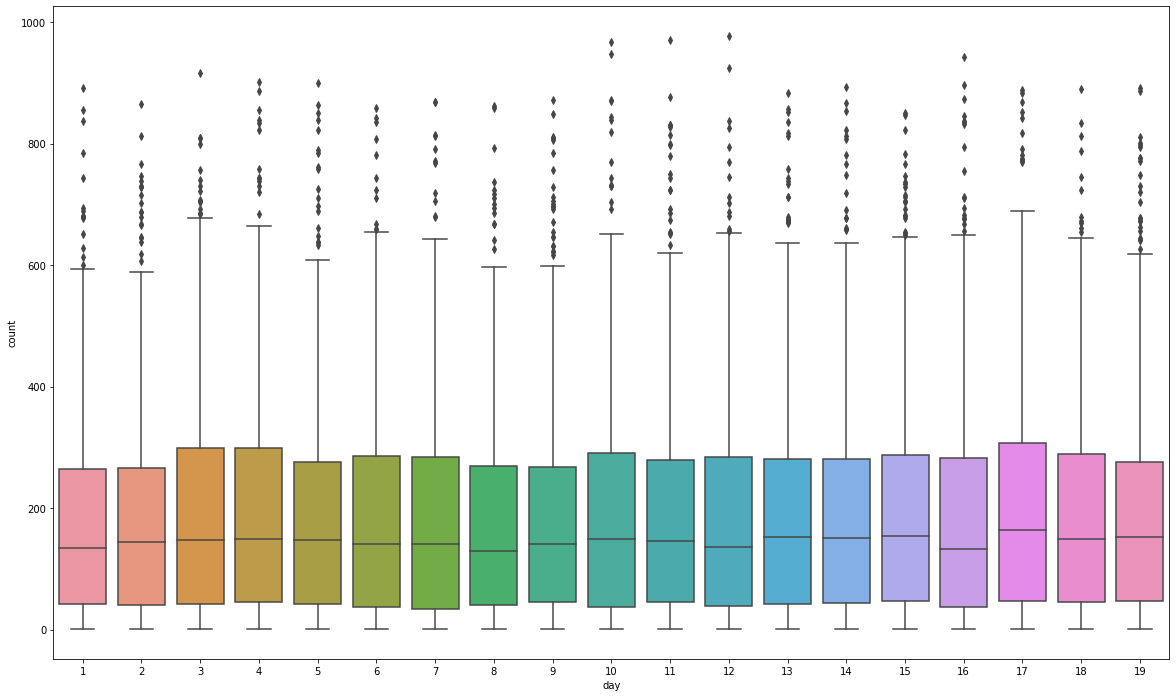

In [45]:
plt.figure(figsize = (20,12))
sns.boxplot(train_temp2['day'], train_temp2['count'])
## day에 따른 차이가 크지않고 아웃라이어가 많다. 아마 각 일별로 주중도있고 주말도 있기 때문에 아웃라이어가 많은 듯. 주중에는 카운트가 1000 가까이 까지도 간다. 출 퇴근시간에 많이 빌림.
## 그래도 최대값이 다름. 월초,월말에 따른 패턴이 다를 수 있기 때문. 다만 테스트 데이터는 20~말일까지로 되어있다.
## 월초,월중에서의 패턴이 월말에서의 패턴과 다를 수 있다. 이 부분이 문제

In [47]:
# ## train error 계산
# train_pre = rf.predict(train2)
# train_pre = np.exp(train_pre)
# # train_pre
# train_pre = pd.DataFrame(train_pre, columns=['train_pre'])
# error = np.log(train['count']+1) - np.log(train_pre['train_pre']+1)
# error = np.square(error)
# error = error.sum()/len(error)
# error

## 
# month 추가할 경우 트레인 에러는 0.01196, 테스트 에러는 0.43416
# month 추가 안하면 트레인 에러는 0.012696, 테스트 에러는 0.39572
# 둘다 오버피팅이긴 한데 month추가 안한게 더 낫긴 한데...
# 물론 랜덤포레스트의 에러는 이 대회의 evaluation과는 다른 에러이기 때문에 그 점을 주의해야 할 듯.
# 확실한건 month를 추가함으로써 오버피팅이 더 심해졌다는 것.

# day 추가한건 트레인에러는 0.012306, 테스트 에러는 0.40724
# 확실히 day나 month를 추가하면 오버피팅이 되는 듯. 트레인 에러가 감소하면 테스트에러는 증가하는 경향은 유지된다.
# 일단은 트레이닝 데이터에는 day가 1~19만 있고 테스트 데이터에는 20~말일 까지 있음. 그러나 day에 따른 카운트의 변화보다는 주중인지 주말인지에 따른 count의 변화가 더 크다.
# 즉 사람들이 자전거 빌릴때 오늘 몇일인지보다는 오늘 무슨 요일인지가 더 중요하다는 것.
# 오히려 학습할 때 같은 day여도 주중인지 주말인지에 따라 hour에 따른 count가 많이 달라지기 때문에 별로 중요한 feature로는 쓰이지 못할 듯. day에 따른 패턴이 일정하지 않기 때문.
# 다만 day를 추가했을 때 트레인 에러가 줄은 이유는 트레이닝 데이터 안에서의 day의 패턴이 어느정도는 있기 때문이며 이걸 학습했기 때문일 것이다.
# 그러나 테스트 데이터에는 20~말일만 있으므로 결과적으로 train에서 day를 추가한 건 오버피팅이 되어버린다.
# month는 왜 오버피팅 된건지 모르겠음.


In [48]:
pd.Series(xgb.feature_importances_, index=train2.columns).sort_values(ascending=False) ## 모델이 학습하면서 어떤 칼럼이 중요한지 본것(IG)

hour          0.460123
workingday    0.150982
year          0.119745
season        0.087711
temp          0.064150
weekday       0.043818
weather       0.024950
atemp         0.017573
humidity      0.014000
holiday       0.006492
windspeed     0.005356
day           0.005100
dtype: float32